In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import SGD, Adam, RMSprop,Adagrad,Adadelta,Adamax,Nadam
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [2]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
print("The shape of Xtrain_images is ",x_train.shape)
print("The shape of Xtrain_labels is ",x_train.shape)
print("The shape of Ytrain_images is ",y_train.shape)

print("The shape of Xtest_images is ",x_test.shape)
print("The length of Xtest_labels is ",len(x_test))
y_train[0]

The shape of Xtrain_images is  (60000, 28, 28)
The shape of Xtrain_labels is  (60000, 28, 28)
The shape of Ytrain_images is  (60000,)
The shape of Xtest_images is  (10000, 28, 28)
The length of Xtest_labels is  10000


9

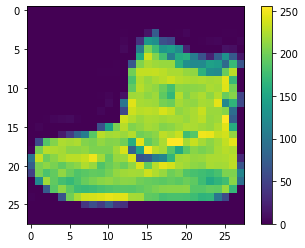

In [3]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.gca().grid(False)
plt.show()

畫出前幾個圖案

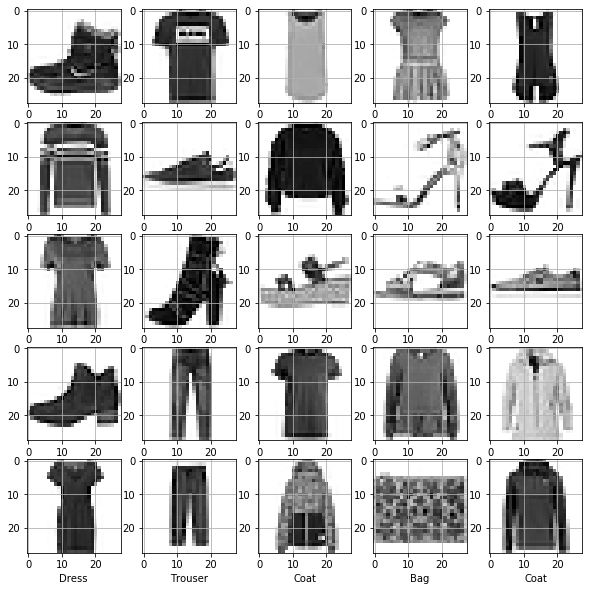

In [4]:
plt.figure(figsize=(10,10))
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat',
             'Sandal','Shirt','Sneaker','Bag','Ankle boot']
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid('off')
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

做標準化

In [5]:
x_train = (x_train - x_train.min())/(x_train.max() - x_train.min()).astype('float32')
x_test = (x_test - x_test.min())/(x_test.max() - x_test.min()).astype('float32')
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
y_train = to_categorical(y_train, 10) #輸出10種
y_test= to_categorical(y_test, 10)

# 第一個

第一個模型先試試看隨便設定的參數
兩層隱藏層，每一層都是10個神經元，activation用relu，loss function用mse，optimizer用SGD

In [6]:
model_1 = Sequential()

model_1.add(Dense(10, input_dim=784, activation='relu'))


model_1.add(Dense(10, activation='relu'))


model_1.add(Dense(10, activation='softmax'))


model_1.compile(loss='mse', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_1.summary()

model_1_history = model_1.fit(x_train, 
                              y_train, 
                              batch_size=500, 
                              epochs=20,
                              validation_split=0.2,
                              verbose = 2, 
                              shuffle = True)




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 1s - loss: 0.0867 - accuracy: 0.2663 - val_loss: 0.0828 - val_accuracy: 0.3358
Epoch 2/20
48000/48000 - 0s - loss: 0.0780 - accuracy: 0.3461 - val_loss: 0.0716 - val_accuracy: 0.4001
Epoch 3/20
48000/48000 - 0s - loss: 0.0645 - accuracy: 0.5061 - val_loss: 0.0557 - val_accuracy: 0.5726
Epoch 4/20
48000/48000

# 二
增加一層隱藏層，其他與第一個模型參數一樣的

In [7]:
model_2 = Sequential()
model_2.add(Dense(10, input_dim=784, activation='relu'))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(10, activation='softmax'))


model_2.compile(loss='mse', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_2.summary()

model_2_history = model_1.fit(x_train, 
                              y_train, 
                              batch_size=500, 
                              epochs=20,
                              validation_split=0.2,
                              verbose = 2, 
                              shuffle = True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 0s - loss: 0.0262 - accuracy: 0.8205 - val_loss: 0.0285 - val_accuracy: 0.8024
Epoch 2/20
48000/48000 - 0s - loss: 0.0260 - accuracy: 0.8218 - val_loss: 0.0260 - val_accuracy:

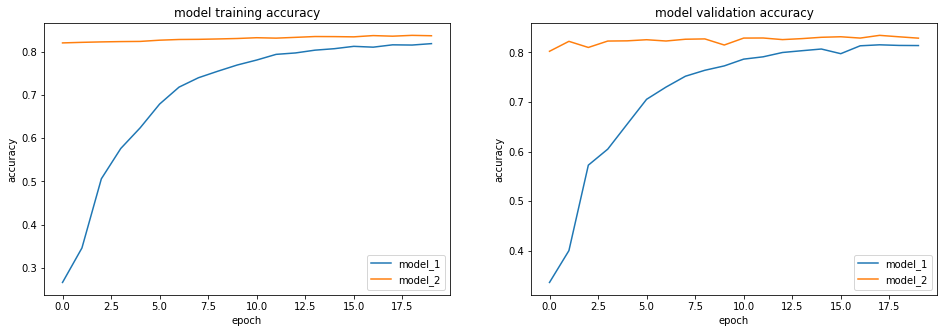

In [8]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(model_1_history.history["accuracy"])
plt.plot(model_2_history.history["accuracy"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_1", "model_2"], loc = "best")

ax2 = fig.add_subplot(1,2,2)
plt.plot(model_1_history.history["val_accuracy"])
plt.plot(model_2_history.history["val_accuracy"])

plt.title("model validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_1", "model_2"], loc = "best")

plt.show()

比較第一個與第二個模型（增加一層隱藏層）發現第二個整體來說比第一個好

# 三
將隱藏層的神經元從10個調整成20個，並與第一個只有10個的模型比較

In [9]:
model_3 = Sequential()


model_3.add(Dense(20, input_dim=784, activation='relu'))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(10, activation='softmax'))

model_3.compile(loss='mse', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_3.summary()

model_3_history = model_1.fit(x_train, 
                              y_train, 
                              batch_size=500, 
                              epochs=20,
                              validation_split=0.2,
                              verbose = 2, 
                              shuffle = True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_8 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 0s - loss: 0.0239 - accuracy: 0.8361 - val_loss: 0.0242 - val_accuracy: 0.8336
Epoch 2/20
48000/48000 - 0s - loss: 0.0236 - accuracy: 0.8389 - val_loss: 0.0238 - val_accuracy: 0.8356
Epoch 3/20
48000/48000 - 0s - loss: 0.0235 - accuracy: 0.8384 - val_loss: 0.0240 - val_accuracy: 0.8352
Epoch 4/20
48000/4

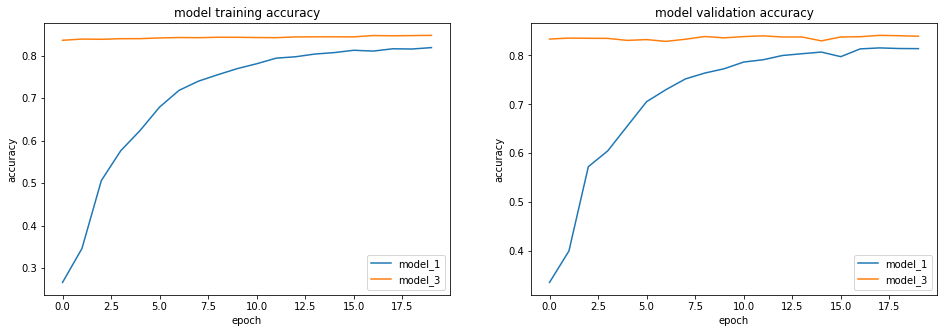

In [10]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(model_1_history.history["accuracy"])
plt.plot(model_3_history.history["accuracy"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_1", "model_3"], loc = "best")

ax2 = fig.add_subplot(1,2,2)
plt.plot(model_1_history.history["val_accuracy"])
plt.plot(model_3_history.history["val_accuracy"])

plt.title("model validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_1", "model_3"], loc = "best")

plt.show()

發現增加神經元也比第一個模型好

# 四
這裡比較不同的activation function之間在這個fashion mnist的資料上會有什麼差異，其餘參數皆固定不變

In [11]:
# relu
model_4_relu_history = model_3_history

# sigmoid
model_4_sigmoid = Sequential()
model_4_sigmoid.add(Dense(20, input_dim=784, activation='sigmoid'))
model_4_sigmoid.add(Dense(20, activation='sigmoid'))
model_4_sigmoid.add(Dense(10, activation='softmax'))
model_4_sigmoid.compile(loss='mse', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_4_sigmoid.summary()
model_4_sigmoid_history = model_4_sigmoid.fit(x_train, y_train, batch_size=500, epochs=20,
                          validation_split=0.2,
                         verbose = 2, shuffle = True)

# tanh
model_4_tanh = Sequential()
model_4_tanh.add(Dense(20, input_dim=784, activation='tanh'))
model_4_tanh.add(Dense(20, activation='tanh'))
model_4_tanh.add(Dense(10, activation='softmax'))
model_4_tanh.compile(loss='mse', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_4_tanh.summary()
model_4_tanh_history = model_4_tanh.fit(x_train, y_train, batch_size=500, epochs=20,
                          validation_split=0.2,
                         verbose = 2, shuffle = True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_11 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 1s - loss: 0.0913 - accuracy: 0.0994 - val_loss: 0.0905 - val_accuracy: 0.0998
Epoch 2/20
48000/48000 - 0s - loss: 0.0901 - accuracy: 0.1140 - val_loss: 0.0900 - val_accuracy: 0.1340
Epoch 3/20
48000/48000 - 0s - loss: 0.0898 - accuracy: 0.1453 - val_loss: 0.0897 - val_accuracy: 0.1782
Epoch 4/20
48000/4

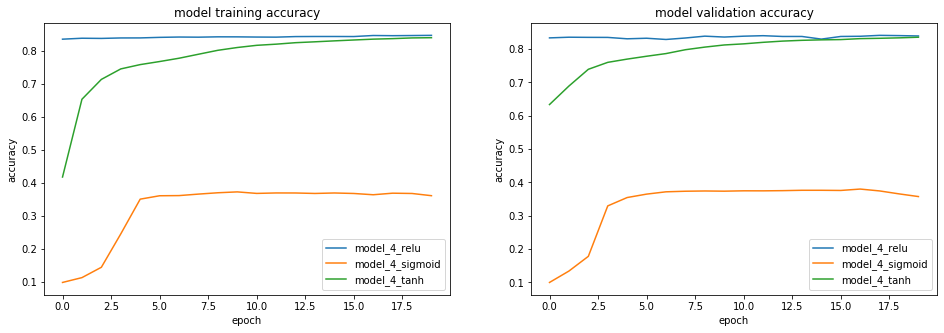

In [12]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(model_4_relu_history.history["accuracy"])
plt.plot(model_4_sigmoid_history.history["accuracy"])
plt.plot(model_4_tanh_history.history["accuracy"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_4_relu", "model_4_sigmoid", "model_4_tanh"], loc = "best")

ax2 = fig.add_subplot(1,2,2)
plt.plot(model_4_relu_history.history["val_accuracy"])
plt.plot(model_4_sigmoid_history.history["val_accuracy"])
plt.plot(model_4_tanh_history.history["val_accuracy"])

plt.title("model validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_4_relu", "model_4_sigmoid", "model_4_tanh"], loc = "best")

plt.show()

從relu，sigmoid，tanh比較發現，整體來說relu 和tanh比sigmoid好非常多，但是relu又比tanh稍微好一點

# 五
這裡比較不同的loss function是否會影響模型的準確率，這裡總共比較六種loss function

In [13]:
# mean_squared_error
model_5_mse_history = model_4_relu_history

# mean_absolute_error
model_5_mae = Sequential()
model_5_mae.add(Dense(20, input_dim=784, activation='relu'))
model_5_mae.add(Dense(20, activation='relu'))
model_5_mae.add(Dense(10, activation='softmax'))
model_5_mae.compile(loss='mae', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_5_mae.summary()
model_5_mae_history = model_5_mae.fit(x_train, y_train, batch_size=500, epochs=20,
                        validation_split=0.2,
                         verbose = 2, shuffle = True)

# mean_absolute_percentage_error
model_5_mape = Sequential()
model_5_mape.add(Dense(20, input_dim=784, activation='relu'))
model_5_mape.add(Dense(20, activation='relu'))
model_5_mape.add(Dense(10, activation='softmax'))
model_5_mape.compile(loss='mape', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_5_mape.summary()
model_5_mape_history = model_5_mape.fit(x_train, y_train, batch_size=500, epochs=20,
                        validation_split=0.2,
                         verbose = 2, shuffle = True)

# mean_squared_logarithmic_error
model_5_msle = Sequential()
model_5_msle.add(Dense(20, input_dim=784, activation='relu'))
model_5_msle.add(Dense(20, activation='relu'))
model_5_msle.add(Dense(10, activation='softmax'))
model_5_msle.compile(loss='msle', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_5_msle.summary()
model_5_msle_history = model_5_msle.fit(x_train, y_train, batch_size=500, epochs=20,
                        validation_split=0.2,
                         verbose = 2, shuffle = True)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_17 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 1s - loss: 0.1661 - accuracy: 0.2483 - val_loss: 0.1377 - val_accuracy: 0.4064
Epoch 2/20
48000/48000 - 1s - loss: 0.1231 - accuracy: 0.4381 - val_loss: 0.1038 - val_accuracy: 0.5676
Epoch 3/20
48000/48000 - 1s - loss: 0.0900 - accuracy: 0.6192 - val_loss: 0.0804 - val_accuracy: 0.6347
Epoch 4/20
48000/4

Epoch 14/20
48000/48000 - 0s - loss: 0.0142 - accuracy: 0.8057 - val_loss: 0.0141 - val_accuracy: 0.8063
Epoch 15/20
48000/48000 - 0s - loss: 0.0140 - accuracy: 0.8098 - val_loss: 0.0138 - val_accuracy: 0.8102
Epoch 16/20
48000/48000 - 0s - loss: 0.0137 - accuracy: 0.8143 - val_loss: 0.0135 - val_accuracy: 0.8137
Epoch 17/20
48000/48000 - 0s - loss: 0.0134 - accuracy: 0.8161 - val_loss: 0.0134 - val_accuracy: 0.8158
Epoch 18/20
48000/48000 - 0s - loss: 0.0132 - accuracy: 0.8183 - val_loss: 0.0133 - val_accuracy: 0.8159
Epoch 19/20
48000/48000 - 0s - loss: 0.0131 - accuracy: 0.8209 - val_loss: 0.0131 - val_accuracy: 0.8167
Epoch 20/20
48000/48000 - 0s - loss: 0.0129 - accuracy: 0.8227 - val_loss: 0.0128 - val_accuracy: 0.8223


In [14]:
# hinge
model_5_hinge = Sequential()
model_5_hinge.add(Dense(20, input_dim=784))
model_5_hinge.add(Dense(20, input_dim=784, activation='relu'))
model_5_hinge.add(Dense(20, activation='relu'))
model_5_hinge.add(Dense(10, activation='softmax'))
model_5_hinge.compile(loss='hinge', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_5_hinge.summary()
model_5_hinge_history = model_5_hinge.fit(x_train, y_train, batch_size=500, epochs=20,
                        validation_split=0.2,
                         verbose = 2, shuffle = True)

# kullback_leibler_divergence
model_5_kld = Sequential()
model_5_kld.add(Dense(20, input_dim=784))
model_5_kld.add(Dense(20, input_dim=784, activation='relu'))
model_5_kld.add(Dense(20, activation='relu'))
model_5_kld.add(Dense(10, activation='softmax'))
model_5_kld.compile(loss='kullback_leibler_divergence', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_5_kld.summary()
model_5_kld_history = model_5_kld.fit(x_train, y_train, batch_size=500, epochs=20,
                        validation_split=0.2,
                         verbose = 2, shuffle = True)


# kullback_leibler_divergence
model_5_entropy = Sequential()
model_5_entropy.add(Dense(20, input_dim=784))
model_5_entropy.add(Dense(20, input_dim=784, activation='relu'))
model_5_entropy.add(Dense(20, activation='relu'))
model_5_entropy.add(Dense(10, activation='softmax'))
model_5_entropy.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_5_entropy.summary()
model_5_entropy_history = model_5_entropy.fit(x_train, y_train, batch_size=500, epochs=20,
                        validation_split=0.2,
                         verbose = 2, shuffle = True)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_26 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_27 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                210       
Total params: 16,750
Trainable params: 16,750
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 1s - loss: 1.0601 - accuracy: 0.2088 - val_loss: 1.0425 - val_accuracy: 0.2947
Epoch 2/20
48000/48000 - 0s - loss: 1.0375 - accuracy: 0.3200 - val_loss: 1.0262 - val_accurac

Epoch 13/20
48000/48000 - 0s - loss: 2.3029 - accuracy: 0.0986 - val_loss: 2.3028 - val_accuracy: 0.1003
Epoch 14/20
48000/48000 - 0s - loss: 2.3029 - accuracy: 0.0999 - val_loss: 2.3029 - val_accuracy: 0.0957
Epoch 15/20
48000/48000 - 0s - loss: 2.3029 - accuracy: 0.0981 - val_loss: 2.3030 - val_accuracy: 0.1005
Epoch 16/20
48000/48000 - 0s - loss: 2.3028 - accuracy: 0.1013 - val_loss: 2.3028 - val_accuracy: 0.0995
Epoch 17/20
48000/48000 - 0s - loss: 2.3030 - accuracy: 0.0981 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 18/20
48000/48000 - 0s - loss: 2.3029 - accuracy: 0.0995 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 19/20
48000/48000 - 0s - loss: 2.3029 - accuracy: 0.0961 - val_loss: 2.3028 - val_accuracy: 0.1003
Epoch 20/20
48000/48000 - 0s - loss: 2.3029 - accuracy: 0.0956 - val_loss: 2.3030 - val_accuracy: 0.0957


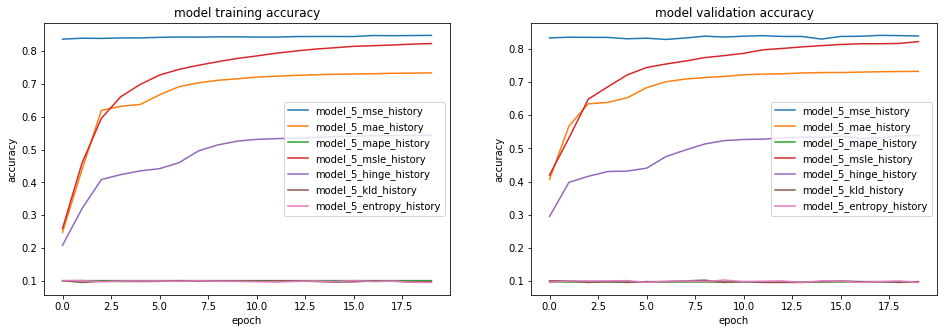

In [15]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(model_5_mse_history.history["accuracy"])
plt.plot(model_5_mae_history.history["accuracy"])
plt.plot(model_5_mape_history.history["accuracy"])
plt.plot(model_5_msle_history.history["accuracy"])
plt.plot(model_5_hinge_history.history["accuracy"])
plt.plot(model_5_kld_history.history["accuracy"])
plt.plot(model_5_entropy_history.history["accuracy"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_5_mse_history", "model_5_mae_history", "model_5_mape_history", "model_5_msle_history", "model_5_hinge_history", "model_5_kld_history","model_5_entropy_history"], loc = "best")

ax2 = fig.add_subplot(1,2,2)
plt.plot(model_5_mse_history.history["val_accuracy"])
plt.plot(model_5_mae_history.history["val_accuracy"])
plt.plot(model_5_mape_history.history["val_accuracy"])
plt.plot(model_5_msle_history.history["val_accuracy"])
plt.plot(model_5_hinge_history.history["val_accuracy"])
plt.plot(model_5_kld_history.history["val_accuracy"])
plt.plot(model_5_entropy_history.history["val_accuracy"])

plt.title("model validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_5_mse_history", "model_5_mae_history", "model_5_mape_history", "model_5_msle_history", "model_5_hinge_history", "model_5_kld_history","model_5_entropy_history"], loc = "best")

plt.show()


從上圖發現mse表現是最好的

# 六 
這裡比較不同優化器做梯度下降的效果

In [17]:
model_adam = Sequential()
model_adam.add(Dense(10, input_dim=784, activation='relu'))
model_adam.add(Dense(10, activation='relu'))
model_adam.add(Dense(10, activation='softmax'))
model_adam.compile(loss='mse', optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics=['accuracy'])
model_adam.summary()
model_adam_history = model_adam.fit(x_train, 
                              y_train, 
                              batch_size=500, 
                              epochs=20,
                              validation_split=0.2,
                              verbose = 2, 
                              shuffle = True)



model_RMSprop = Sequential()
model_RMSprop.add(Dense(10, input_dim=784, activation='relu'))
model_RMSprop.add(Dense(10, activation='relu'))
model_RMSprop.add(Dense(10, activation='softmax'))
model_RMSprop.compile(loss='mse', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])
model_RMSprop.summary()
model_RMSprop_history = model_RMSprop.fit(x_train, 
                              y_train, 
                              batch_size=500, 
                              epochs=20,
                              validation_split=0.2,
                              verbose = 2, 
                              shuffle = True)


model_Adagrad = Sequential()
model_Adagrad.add(Dense(10, input_dim=784, activation='relu'))
model_Adagrad.add(Dense(10, activation='relu'))
model_Adagrad.add(Dense(10, activation='softmax'))
model_Adagrad.compile(loss='mse', optimizer=Adagrad(), metrics=['accuracy'])
model_Adagrad.summary()
model_Adagrad_history = model_Adagrad.fit(x_train, 
                              y_train, 
                              batch_size=500, 
                              epochs=20,
                              validation_split=0.2,
                              verbose = 2, 
                              shuffle = True)

model_Adadelta = Sequential()
model_Adadelta.add(Dense(10, input_dim=784, activation='relu'))
model_Adadelta.add(Dense(10, activation='relu'))
model_Adadelta.add(Dense(10, activation='softmax'))
model_Adadelta.compile(loss='mse', optimizer=Adadelta(), metrics=['accuracy'])
model_Adadelta.summary()
model_Adadelta_history = model_Adagrad.fit(x_train, 
                              y_train, 
                              batch_size=500, 
                              epochs=20,
                              validation_split=0.2,
                              verbose = 2, 
                              shuffle = True)



model_Adamax = Sequential()
model_Adamax.add(Dense(10, input_dim=784, activation='relu'))
model_Adamax.add(Dense(10, activation='relu'))
model_Adamax.add(Dense(10, activation='softmax'))
model_Adamax.compile(loss='mse', optimizer=Adamax(), metrics=['accuracy'])
model_Adamax.summary()
model_Adamax_history = model_Adagrad.fit(x_train, 
                              y_train, 
                              batch_size=500, 
                              epochs=20,
                              validation_split=0.2,
                              verbose = 2, 
                              shuffle = True)



model_Nadam = Sequential()
model_Nadam.add(Dense(10, input_dim=784, activation='relu'))
model_Nadam.add(Dense(10, activation='relu'))
model_Nadam.add(Dense(10, activation='softmax'))
model_Nadam.compile(loss='mse', optimizer=Nadam(), metrics=['accuracy'])
model_Nadam.summary()
model_Nadam_history = model_Adagrad.fit(x_train, 
                              y_train, 
                              batch_size=500, 
                              epochs=20,
                              validation_split=0.2,
                              verbose = 2, 
                              shuffle = True)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_47 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_48 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 1s - loss: 0.0717 - accuracy: 0.3891 - val_loss: 0.0566 - val_accuracy: 0.5483
Epoch 2/20
48000/48000 - 0s - loss: 0.0449 - accuracy: 0.6674 - val_loss: 0.0380 - val_accuracy: 0.7293
Epoch 3/20
48000/48000 - 0s - loss: 0.0343 - accuracy: 0.7588 - val_loss: 0.0313 - val_accuracy: 0.7788
Epoch 4/20
48000/48

Epoch 17/20
48000/48000 - 0s - loss: 0.0889 - accuracy: 0.1835 - val_loss: 0.0889 - val_accuracy: 0.1838
Epoch 18/20
48000/48000 - 0s - loss: 0.0888 - accuracy: 0.1863 - val_loss: 0.0889 - val_accuracy: 0.1878
Epoch 19/20
48000/48000 - 0s - loss: 0.0888 - accuracy: 0.1891 - val_loss: 0.0888 - val_accuracy: 0.1908
Epoch 20/20
48000/48000 - 0s - loss: 0.0887 - accuracy: 0.1919 - val_loss: 0.0888 - val_accuracy: 0.1942
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_56 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_57 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
___________________________

Epoch 13/20
48000/48000 - 0s - loss: 0.0866 - accuracy: 0.2700 - val_loss: 0.0867 - val_accuracy: 0.2727
Epoch 14/20
48000/48000 - 0s - loss: 0.0866 - accuracy: 0.2704 - val_loss: 0.0866 - val_accuracy: 0.2727
Epoch 15/20
48000/48000 - 0s - loss: 0.0865 - accuracy: 0.2712 - val_loss: 0.0866 - val_accuracy: 0.2734
Epoch 16/20
48000/48000 - 0s - loss: 0.0865 - accuracy: 0.2722 - val_loss: 0.0865 - val_accuracy: 0.2738
Epoch 17/20
48000/48000 - 0s - loss: 0.0865 - accuracy: 0.2728 - val_loss: 0.0865 - val_accuracy: 0.2745
Epoch 18/20
48000/48000 - 0s - loss: 0.0864 - accuracy: 0.2736 - val_loss: 0.0865 - val_accuracy: 0.2752
Epoch 19/20
48000/48000 - 0s - loss: 0.0864 - accuracy: 0.2743 - val_loss: 0.0864 - val_accuracy: 0.2750
Epoch 20/20
48000/48000 - 0s - loss: 0.0863 - accuracy: 0.2748 - val_loss: 0.0864 - val_accuracy: 0.2760


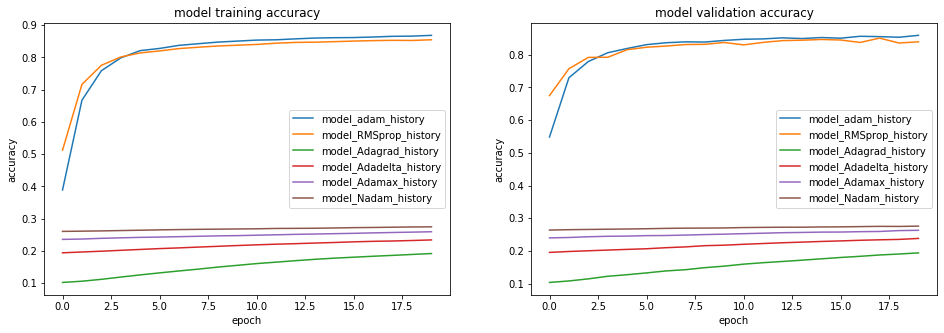

In [18]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(model_adam_history.history["accuracy"])
plt.plot(model_RMSprop_history.history["accuracy"])
plt.plot(model_Adagrad_history.history["accuracy"])
plt.plot(model_Adadelta_history.history["accuracy"])
plt.plot(model_Adamax_history.history["accuracy"])
plt.plot(model_Nadam_history.history["accuracy"])


plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_adam_history", "model_RMSprop_history", "model_Adagrad_history", "model_Adadelta_history", "model_Adamax_history", "model_Nadam_history"], loc = "best")

ax2 = fig.add_subplot(1,2,2)
plt.plot(model_adam_history.history["val_accuracy"])
plt.plot(model_RMSprop_history.history["val_accuracy"])
plt.plot(model_Adagrad_history.history["val_accuracy"])
plt.plot(model_Adadelta_history.history["val_accuracy"])
plt.plot(model_Adamax_history.history["val_accuracy"])
plt.plot(model_Nadam_history.history["val_accuracy"])


plt.title("model validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_adam_history", "model_RMSprop_history", "model_Adagrad_history", "model_Adadelta_history", "model_Adamax_history", "model_Nadam_history"], loc = "best")

plt.show()


從上面不同的優化器比較，adam和RMSprop遠超過其他優化器，雖然在一開始RMSprop是優於adam但最後adam的準確率還是優於RMSprop

# 合併
最後將所有以上結果最好的各種參數結合起來

In [20]:
model_f = Sequential()
model_f.add(Dense(20, input_dim=784, activation='relu'))
model_f.add(BatchNormalization())
model_f.add(Dense(20, activation='relu'))
model_f.add(BatchNormalization())
model_f.add(Dense(10, activation='softmax'))
model_f.compile(loss='mse', optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics=['accuracy'])
model_f.summary()
model_f_history = model_f.fit(x_train, 
                              y_train, 
                              batch_size=500, 
                              epochs=150,
                              validation_split=0.2,
                              verbose = 2, 
                              shuffle = True,
#                                  callbacks= [
                   
#                           EarlyStopping(patience = 1, 
#                                         verbose=2,  
                                        
#                                         monitor='val_accuracy')
#                           ]
                          )



Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 20)                15700     
_________________________________________________________________
batch_normalization (BatchNo (None, 20)                80        
_________________________________________________________________
dense_65 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization_1 (Batch (None, 20)                80        
_________________________________________________________________
dense_66 (Dense)             (None, 10)                210       
Total params: 16,490
Trainable params: 16,410
Non-trainable params: 80
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/150
48000/48000 - 1s - loss: 0.0440 - accuracy: 0.6990 -

Epoch 69/150
48000/48000 - 0s - loss: 0.0116 - accuracy: 0.9265 - val_loss: 0.0218 - val_accuracy: 0.8562
Epoch 70/150
48000/48000 - 0s - loss: 0.0116 - accuracy: 0.9281 - val_loss: 0.0230 - val_accuracy: 0.8482
Epoch 71/150
48000/48000 - 0s - loss: 0.0116 - accuracy: 0.9273 - val_loss: 0.0202 - val_accuracy: 0.8683
Epoch 72/150
48000/48000 - 0s - loss: 0.0115 - accuracy: 0.9276 - val_loss: 0.0216 - val_accuracy: 0.8593
Epoch 73/150
48000/48000 - 0s - loss: 0.0113 - accuracy: 0.9289 - val_loss: 0.0211 - val_accuracy: 0.8637
Epoch 74/150
48000/48000 - 0s - loss: 0.0113 - accuracy: 0.9301 - val_loss: 0.0208 - val_accuracy: 0.8634
Epoch 75/150
48000/48000 - 0s - loss: 0.0112 - accuracy: 0.9302 - val_loss: 0.0210 - val_accuracy: 0.8607
Epoch 76/150
48000/48000 - 0s - loss: 0.0113 - accuracy: 0.9294 - val_loss: 0.0203 - val_accuracy: 0.8660
Epoch 77/150
48000/48000 - 0s - loss: 0.0113 - accuracy: 0.9290 - val_loss: 0.0207 - val_accuracy: 0.8659
Epoch 78/150
48000/48000 - 0s - loss: 0.0112 -

Epoch 146/150
48000/48000 - 0s - loss: 0.0097 - accuracy: 0.9415 - val_loss: 0.0222 - val_accuracy: 0.8609
Epoch 147/150
48000/48000 - 0s - loss: 0.0097 - accuracy: 0.9413 - val_loss: 0.0225 - val_accuracy: 0.8579
Epoch 148/150
48000/48000 - 0s - loss: 0.0096 - accuracy: 0.9424 - val_loss: 0.0226 - val_accuracy: 0.8588
Epoch 149/150
48000/48000 - 0s - loss: 0.0096 - accuracy: 0.9415 - val_loss: 0.0219 - val_accuracy: 0.8647
Epoch 150/150
48000/48000 - 0s - loss: 0.0095 - accuracy: 0.9425 - val_loss: 0.0226 - val_accuracy: 0.8584


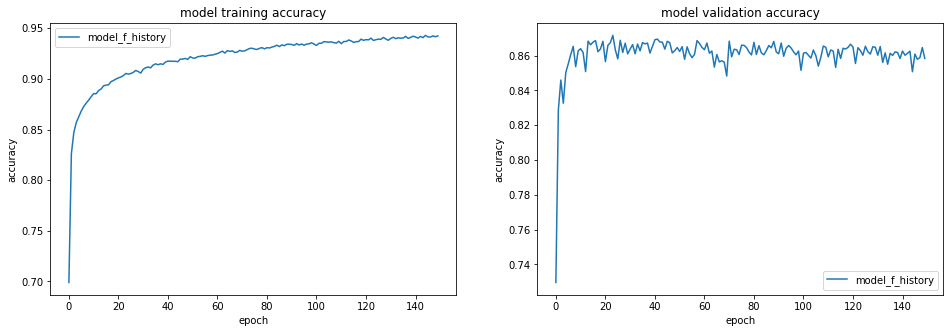

In [22]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(model_f_history.history["accuracy"])
#plt.plot(model_f_2_history.history["accuracy"])
plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_f_history","model_f_history+dropout"])


ax2 = fig.add_subplot(1,2,2)
plt.plot(model_f_history.history["val_accuracy"])
#plt.plot(model_f_2_history.history["val_accuracy"])
plt.title("model validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_f_history","model_f_history+regulization"])
plt.show()

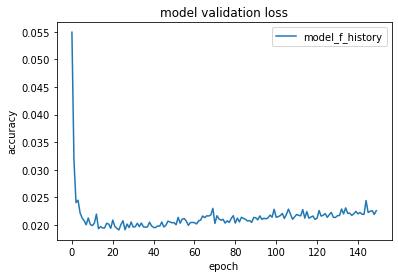

In [23]:
# ax2 = fig.add_subplot(1,2,2)
plt.plot(model_f_history.history["val_loss"])
#plt.plot(model_f_2_history.history["val_loss"])
plt.title("model validation loss")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_f_history","model_f_history+regulization"])
plt.show()

In [24]:
test_loss,test_acc = model_f.evaluate(x_test,y_test)
print('Test Acc:',test_acc)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.0242 - accuracy: 0.8503
Test Acc: 0.8503
